<a href="https://colab.research.google.com/github/SilapDev/cats_vs_dogs_ai/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaggle

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get("KAGGLE_KEY")
os.environ["KAGGLE_USERNAME"] = userdata.get("KAGGLE_USERNAME")

print(userdata.get("KAGGLE_KEY"))
print(userdata.get("KAGGLE_USERNAME"))

87277614495d87177a34a5f519c6bfab
silaprustamow


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:03<00:00, 341MB/s]
100% 1.06G/1.06G [00:03<00:00, 324MB/s]


In [ ]:
!ls

!unzip dogs-vs-cats.zip -d CV

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: CV/train/dogs/dog.4419.jpg  
  inflating: CV/train/dogs/dog.442.jpg  
  inflating: CV/train/dogs/dog.4420.jpg  
  inflating: CV/train/dogs/dog.4421.jpg  
  inflating: CV/train/dogs/dog.4422.jpg  
  inflating: CV/train/dogs/dog.4424.jpg  
  inflating: CV/train/dogs/dog.4425.jpg  
  inflating: CV/train/dogs/dog.4426.jpg  
  inflating: CV/train/dogs/dog.4427.jpg  
  inflating: CV/train/dogs/dog.4431.jpg  
  inflating: CV/train/dogs/dog.4433.jpg  
  inflating: CV/train/dogs/dog.4436.jpg  
  inflating: CV/train/dogs/dog.4438.jpg  
  inflating: CV/train/dogs/dog.4439.jpg  
  inflating: CV/train/dogs/dog.444.jpg  
  inflating: CV/train/dogs/dog.4440.jpg  
  inflating: CV/train/dogs/dog.4441.jpg  
  inflating: CV/train/dogs/dog.4442.jpg  
  inflating: CV/train/dogs/dog.4443.jpg  
  inflating: CV/train/dogs/dog.4444.jpg  
  inflating: CV/train/dogs/dog.4445.jpg  
  inflating: CV/train/dogs/dog.4446.jpg  
  inflatin

In [ ]:
!ls ./CV/train

cats  dogs


In [ ]:
print( len(os.listdir("./CV/dogs_vs_cats/test/dogs")))

2500


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
import os
import shutil

def move_all_files(src_dir, dest_dir):
    # Ensure destination directory exists, if not, create it
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Iterate over all files in the source directory
    for filename in os.listdir(src_dir):
        src_file = os.path.join(src_dir, filename)
        dest_file = os.path.join(dest_dir, filename)

        # Move file from source to destination
        if os.path.isfile(src_file):
            shutil.move(src_file, dest_file)
            print(f'Moved: {src_file} -> {dest_file}')
        else:
            print(f'Skipping non-file: {src_file}')

# Define source and destination directories
source_directory = './CV/dogs_vs_cats/test/dogs/'
destination_directory = './CV/dogs_vs_cats/test/'

# Move all files
move_all_files(source_directory, destination_directory)

Moved: ./CV/dogs_vs_cats/test/dogs/dog.2857.jpg -> ./CV/dogs_vs_cats/test/dog.2857.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.3998.jpg -> ./CV/dogs_vs_cats/test/dog.3998.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.794.jpg -> ./CV/dogs_vs_cats/test/dog.794.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.5591.jpg -> ./CV/dogs_vs_cats/test/dog.5591.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.11567.jpg -> ./CV/dogs_vs_cats/test/dog.11567.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.5403.jpg -> ./CV/dogs_vs_cats/test/dog.5403.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.4225.jpg -> ./CV/dogs_vs_cats/test/dog.4225.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.11226.jpg -> ./CV/dogs_vs_cats/test/dog.11226.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.7808.jpg -> ./CV/dogs_vs_cats/test/dog.7808.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.2256.jpg -> ./CV/dogs_vs_cats/test/dog.2256.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.5633.jpg -> ./CV/dogs_vs_cats/test/dog.5633.jpg
Moved: ./CV/dogs_vs_cats/test/dogs/dog.70

In [ ]:
!rm -r ./CV/dogs_vs_cats/test/cats/

In [ ]:
filenames = os.listdir("./CV/dogs_vs_cats/train/")

categories = []

for f_name in filenames:
  category = f_name.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else:
    categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(len(categories))

20000


In [ ]:
test_filenames = os.listdir("./CV/dogs_vs_cats/test/")

test_categories = []

for f_name in test_filenames:
  category = f_name.split('.')[0]
  if category == 'dog':
    test_categories.append(1)
  else:
    test_categories.append(0)

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})

print(len(test_categories))

5000


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(Image_Width, Image_Height, Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation = 'relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlyStop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, verbose = 1, factor=0.5, min_lr = 0.00001)
callbacks = [earlyStop, learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({0:"cat", 1:"dog"})
train_df,validate_df = train_test_split(df, test_size = 0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

print(train_df.shape, validate_df.shape)

(16000, 2) (4000, 2)


In [ ]:
test_df["category"] = test_df["category"].replace({0: "cat", 1:"dog"})
test_df = test_df.reset_index(drop=True)

total_test = test_df.shape[0]

print(total_test)

5000


In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                    rescale= 1./255,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    "./CV/dogs_vs_cats/train/",
                                                    x_col="filename",
                                                    y_col="category",
                                                    target_size=Image_Size,
                                                    class_mode="categorical",
                                                    batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                    "./CV/dogs_vs_cats/train/",
                                                    x_col="filename",
                                                    y_col="category",
                                                    target_size=Image_Size,
                                                    class_mode="categorical",
                                                    batch_size=batch_size)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                    "./CV/dogs_vs_cats/test/",
                                                    x_col="filename",
                                                    y_col="category",
                                                    target_size=Image_Size,
                                                    class_mode="categorical",
                                                    batch_size=batch_size)


Found 16000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
epochs=10
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10


<ipython-input-26-0303d50756ed>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1066/1066 [==============================] - 156s 145ms/step - loss: 0.7687 - accuracy: 0.6231 - val_loss: 0.6104 - val_accuracy: 0.6684 - lr: 0.0010
Epoch 2/10
1066/1066 [==============================] - 155s 145ms/step - loss: 0.6139 - accuracy: 0.6731 - val_loss: 1.0080 - val_accuracy: 0.6055 - lr: 0.0010
Epoch 3/10
1066/1066 [==============================] - ETA: 0s - loss: 0.5681 - accuracy: 0.7124
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1066/1066 [==============================] - 155s 145ms/step - loss: 0.5681 - accuracy: 0.7124 - val_loss: 0.9974 - val_accuracy: 0.6459 - lr: 0.0010
Epoch 4/10
1066/1066 [==============================] - 155s 146ms/step - loss: 0.5131 - accuracy: 0.7468 - val_loss: 0.4538 - val_accuracy: 0.7965 - lr: 5.0000e-04
Epoch 5/10
1066/1066 [==============================] - 155s 145ms/step - loss: 0.4906 - accuracy: 0.7620 - val_loss: 0.4027 - val_accuracy: 0.8226 - lr: 5.0000e-04
Epoch 6/10
1066/1066 [=============

In [ ]:
model.save("cat_vs_dog.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test1_filenames = os.listdir("./CV/dogs_vs_cats/test/")
test1_df = pd.DataFrame({
    'filename': test1_filenames
})
nb_samples = test1_df.shape[0]

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-30-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [ ]:
test1_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test1_df['category'] = test1_df['category'].replace(label_map)
test1_df['category'] = test1_df['category'].replace({ 'dog': 1, 'cat': 0 })

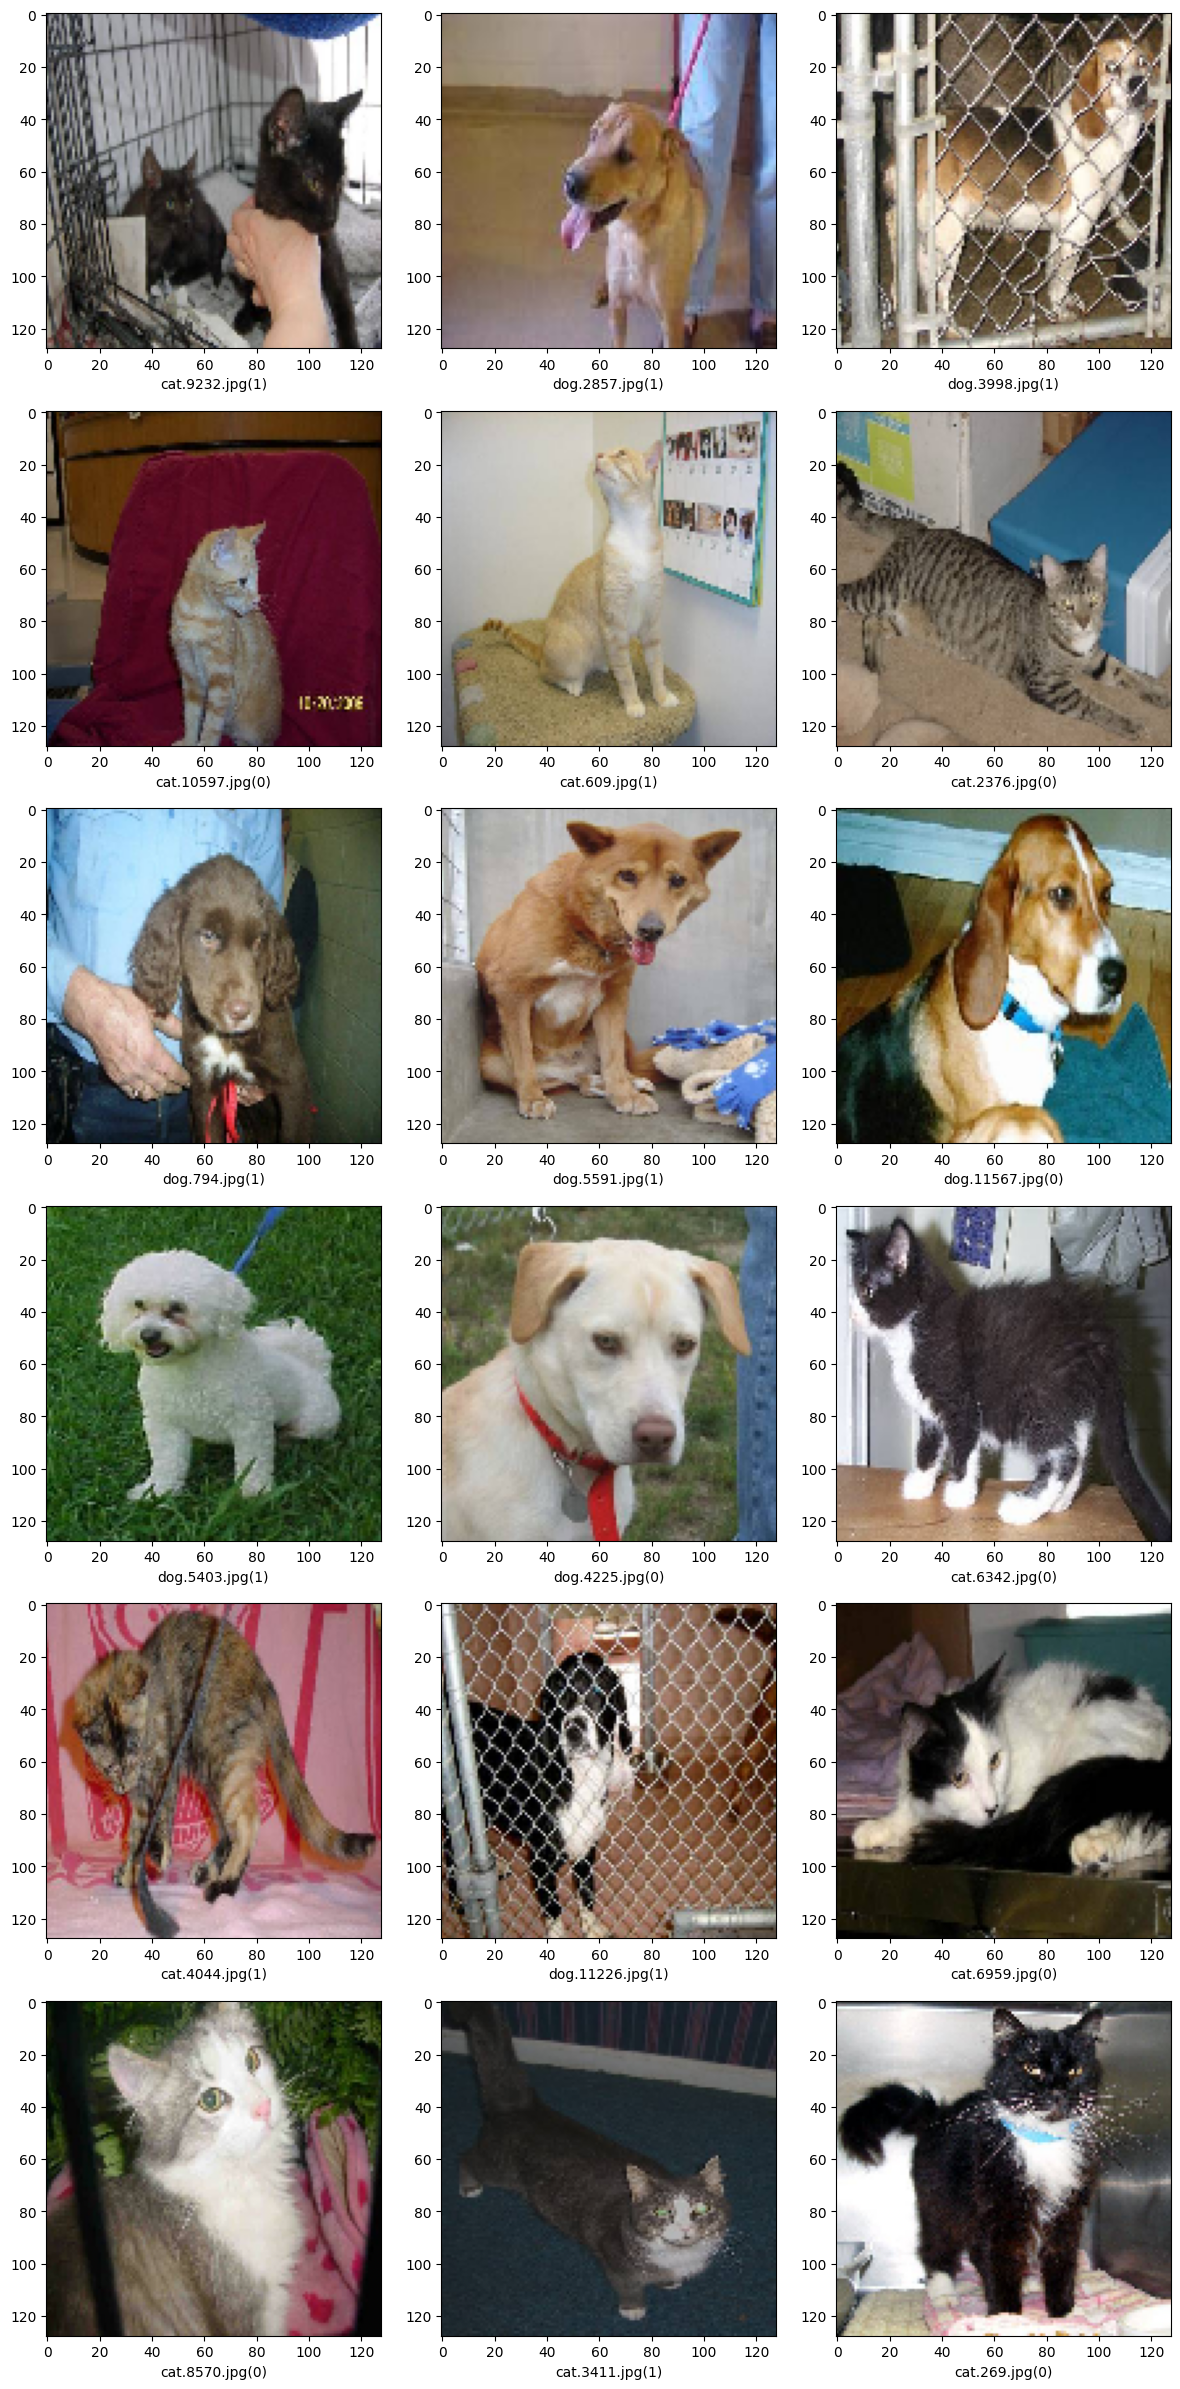

In [ ]:
sample_test = test1_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./CV/dogs_vs_cats/test/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil

# Define the source file path in Google Drive
source_file = '/content/drive/MyDrive/Torrent/cat_vs_dog.h5'

# Define the destination path in Colab
destination_path = '/content/'

# Copy the file from Google Drive to Colab
shutil.copy(source_file, destination_path)

print(f'File copied to {destination_path}')


File copied to /content/


In [9]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()

print(uploaded)


Saving dog.jpg to dog.jpg
{'dog.jpg': b'RIFF\x90\x1f\x01\x00WEBPVP8 \x84\x1f\x01\x00\x10\xae\x07\x9d\x01*\xb0\x04 \x03>9\x1c\x8bD\xa2!\xa2\xa6"3J\x10\xc0\x07\tgm\xe3\xa0Pq\x80i\xfao\xf7\'\xf8\x0e\x15e\xbf\xd6~\xdb\xe5A\xb2\x7fQ\xf2\xbe\xe6\xbf\xd9\xfb\xe5\xfe\x17\xf6?\xc9O\xcc?\xb2~\xc6|\x00\x7f)\xfe\xbd\xe9Y\xfd\xd7vwo\xff\x81\xec\x07\xe1?\xcc\xde{\xdf\xf3}\x10\x7fc\xff\x81\xd4\x13\xfd\x8f4\xbfj\xdd\xcc\xed\xad\x7f\xb8\xb6_\xf9\x07\x0f/.\xe4\x99j_V\xbee\x1f\xb3\x1f\xb2~\xf6}i\xf9\xc8\xfd\xc5\xfd\xce\xf7U\xf5?\xfdg\xd4[\xfa\xa7\xfc.\xbc/DO7\xffY\xdf\xdd\xfc0\x9f\xfd\xff\xff\xff\xf4\xfb \xf8\xe7\xfa\x9f\xfd\xff\xde\xf9\x1b\xe8?\x91\x9e\xc3\x9f\xb6\\W\xfb\x96\xa7\x7fE\xfd\xa7\x93\xf6\x84>}\xfd\xdf\xa1\x7f\x9a\xbdG\xbe\x03\xfd\xdf\x96\x0f\xed\xfa?\xfa\x9f\x9c\xffA|p\xbd\xaf\xd87\xf6\x07\xa5\x8e\x94\x7fe\xf5\x18\xe9\xc43\xa0_W\x14h\xacB\x8b\xb8Ocz\xa5:\xb9\xf1\xf0}}\xf1\xb9\xbd\xa0\xbf\x92=`m\x02\xa3\x86\x1f~\xa7v\x18\x06\xf5j\x06\xb8\xd0\x13r|m\x9f\xc5\xffu\x10Aq\x9fZw\x84\x82=y\x1d\xcb\x

In [4]:
!ls

6.jpeg	cat_vs_dog.h5  drive  sample_data


In [7]:
from keras.models import load_model
model = load_model('./cat_vs_dog.h5')

In [10]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("./dog.jpg")
im=im.resize((128, 128))
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict([im])[0]
cl=np.argmax(pred)
print(results[cl])

1/1 [==============================] - 0s 48ms/step
dog
